In [ ]:
from ipywidgets import *
import functools

from numpy import random as rnd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

rnd.seed(1234)

In [ ]:
def interactPDF(_func=None, theoretical=None, max=100, min=10, step=10):
    """

        Для изображения зависимости выборочных распределений от размера выборки
        можно использовать этот декоратор или любой другой наглядный способ.

        Parameters
        ----------
        theoretical : function
            Theoretical pdf.
        max : int
            maximum slider value
        min : int
            minimum slider value
        step : int
            slider step
    """
    def decorator(fun):
        @functools.wraps(fun)
        def wraper():
            def plot(size):
                ax = sns.kdeplot(fun(size), label='empirical pdf')
                if theoretical:
                    a, b = ax.get_xlim()
                    x_pdf = np.linspace(a, b, 100)
                    y_pdf = [theoretical(x) for x in x_pdf]

                    ax.plot(x_pdf, y_pdf, 'r', lw=2, label='theoretical pdf')
                    ax.legend()
            kSlider = widgets.IntSlider(value=min, min=min, max=max, step=step, description='Sample Size:')
            interact(plot, size=kSlider)
        return wraper
    if _func is None:
        return decorator
    return decorator(_func)

Пример использования `interactPDF`

interactive(children=(IntSlider(value=2, description='Sample Size:', max=20, min=2), Output()), _dom_classes=(…

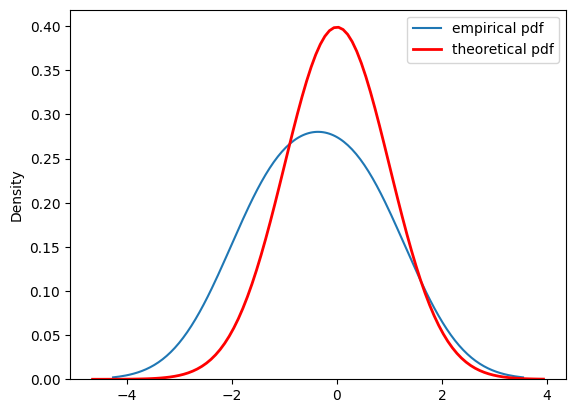

In [ ]:
from scipy.stats import norm

@interactPDF(theoretical=norm.pdf, min=2, max=20, step=1)
def my_function(sample_size):
    distr = rnd.normal(0, 1, size=sample_size)
    return distr
my_function()

## Предельные теоремы

### Закон больших чисел

Численно проверьте закон больших чисел: сгенерируйте 10000 независимых наблюдений из \$\mathcal{N}(5, 4^2)\$, вычислите среднее по первым \$k\$ наблюдениям \$(k=20, \ldots, 10000)\$. Постройте график зависимости этого среднего от \$k\$.

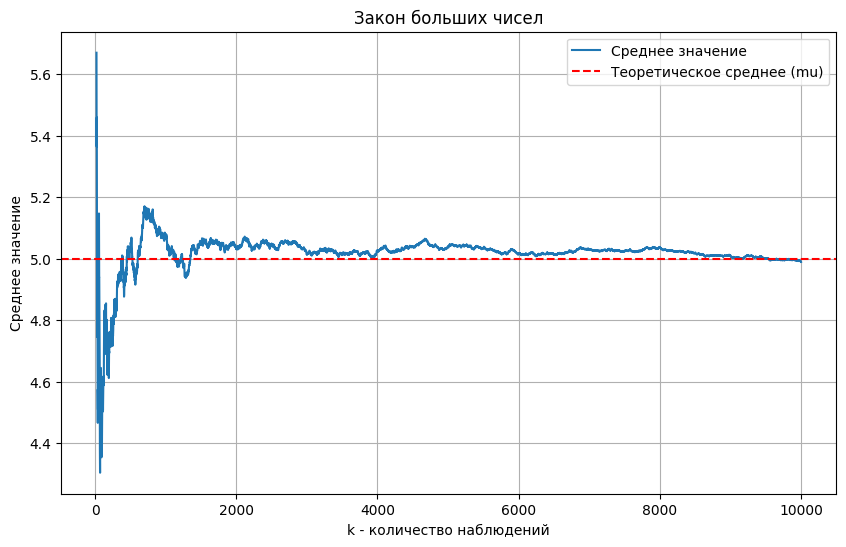

In [ ]:
mu = 5
sigma = 4
size = 10000

sample = rnd.normal(mu, sigma, size)
k_values = np.arange(20, size + 1)
averages = [np.mean(sample[:k]) for k in k_values]


plt.figure(figsize=(10, 6))
plt.plot(k_values, averages, label='Среднее значение')
plt.axhline(y=mu, color='r', linestyle='--', label='Теоретическое среднее (mu)')
plt.xlabel('k - количество наблюдений')
plt.ylabel('Среднее значение')
plt.title('Закон больших чисел')
plt.legend()
plt.grid(True)
plt.show()

Сделайте аналогичное упражнение для стандартного распределения Коши `standard_cauchy`. Увеличьте `size` до \$10^6\$, проведите несколько запусков. Работает ли ЗБЧ в этом случае? Прокомментируйте.

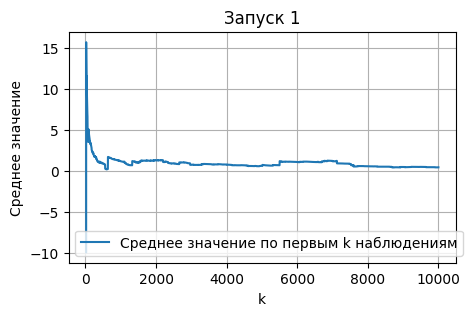

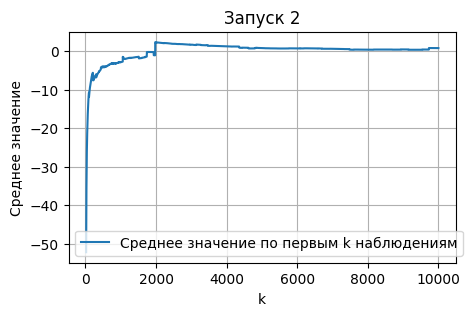

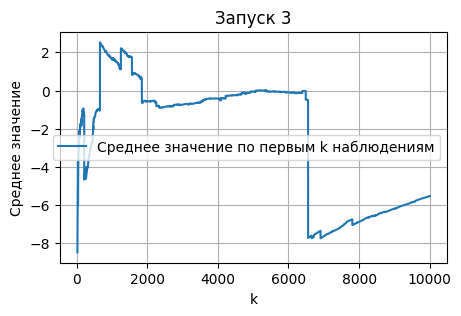

In [ ]:
size = 10**6

for i in range(3):
  num = i + 1
  sample = rnd.standard_cauchy(size)
  k_values = np.arange(20, 10000)
  averages = [np.mean(sample[:k]) for k in k_values]

  plt.figure(figsize=(5, 3))
  plt.plot(k_values, averages, label='Среднее значение по первым k наблюдениям')
  plt.xlabel('k')
  plt.ylabel('Среднее значение')
  plt.title(f'Запуск {num}')
  plt.legend()
  plt.grid(True)
  plt.show()


ВЫВОД:
По графикам видно, что даже при большом количестве наблюдений среднее значение сильно колеблется, ЗБЧ не работает для стандартного распределения Коши





### Центральная предельная теорема

Проверьте центральную предельную теорему для экспоненциального распределения с `lambda=4`. Сгенерируйте `reps=10000` повторений среднего выборки для каждого размера из списка `sizes`. Постройте эмпирическую плотность для каждого случая, а также вычислите среднее и стандартное отклонение. Какой вывод вы можете сделать про распределение среднего выборки?

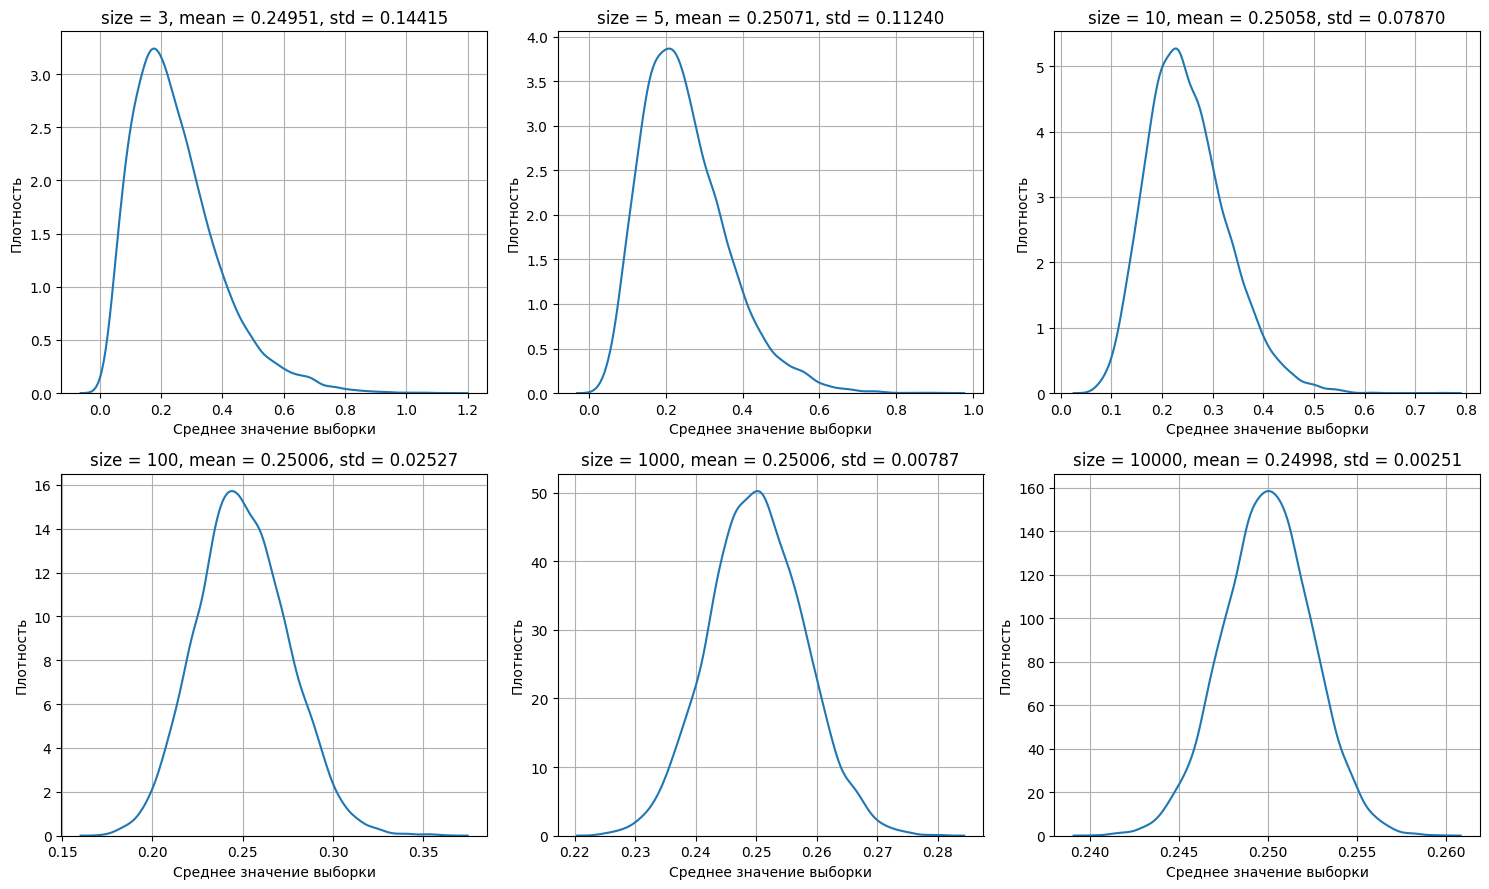

In [ ]:
reps = 10000
sizes = [3, 5, 10, 100, 1000, 10000]
lambd = 4

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 9))

for i in range(len(sizes)):
    size = sizes[i]
    sample = [np.mean(rnd.exponential(scale=1/lambd, size=size)) for num in range(reps)]
    sns.kdeplot(sample, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f'size = {size}, mean = {np.mean(sample):.5f}, std = {np.std(sample):.5f}')
    axes[i // 3, i % 3].set_xlabel('Среднее значение выборки')
    axes[i // 3, i % 3].set_ylabel('Плотность')
    axes[i // 3, i % 3].grid(True)
plt.tight_layout()
plt.show()

ВЫВОД:
 При увеличении размера выборки стандартное отклонение уменьшается, а распределение средних значений приближается к нормальному распределению.

Для сгенериррованных данных проведите стандартизацию распределений, сравните с ЦПТ.

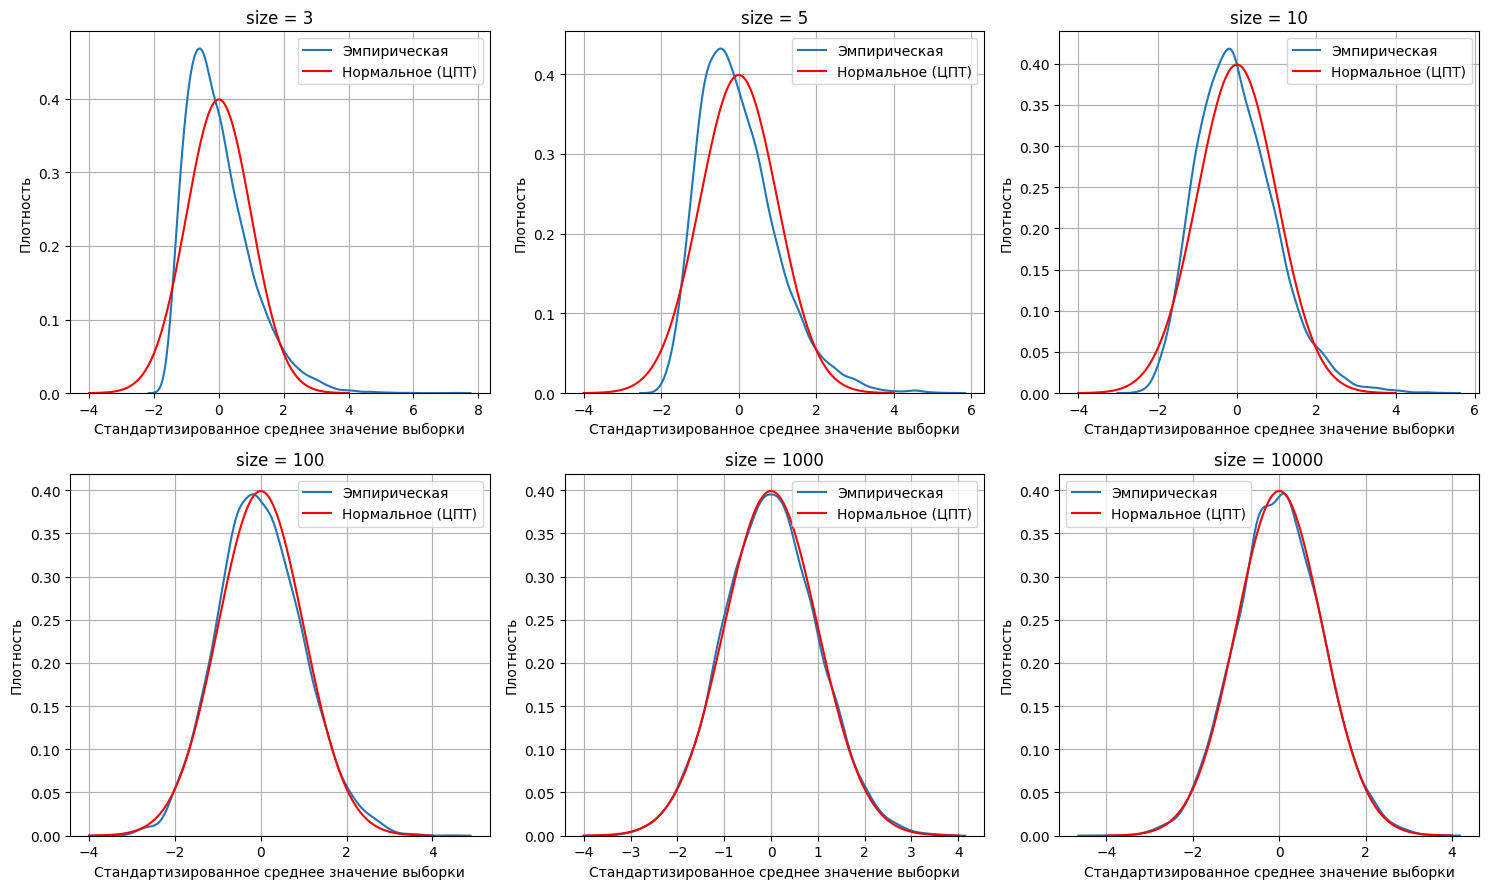

In [ ]:
import scipy.stats as stats

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 9))

for i in range(len(sizes)):
    size = sizes[i]
    sample = [np.mean(rnd.exponential(1/lambd, size)) for num in range(reps)]
    standardized = [(sample-np.mean(sample))/np.std(sample)]
    sns.kdeplot(standardized, ax=axes[i // 3, i % 3], label='Эмпирическая')

    x = np.linspace(-4, 4, 1000)
    y = stats.norm(0,1).pdf(x)

    axes[i // 3, i % 3].plot(x, y, 'r', label='Нормальное (ЦПТ)')
    axes[i // 3, i % 3].set_title(f'size = {size}')
    axes[i // 3, i % 3].legend()
    axes[i // 3, i % 3].set_xlabel('Стандартизированное среднее значение выборки')
    axes[i // 3, i % 3].set_ylabel('Плотность')
    axes[i // 3, i % 3].grid(True)
plt.tight_layout()
plt.show()

## Точечные оценки
### Метод моментов
Оценка числа преступлений (задача с семинара). Пусть ежедневно в городе происходит `k=100` преступлений. Вероятность, что о преступлении сообщат в полицию, равна `p=0.9`. При помощи метода моментов оценить \$k\$ и \$p\$ по `30, 100, 1000` дням наблюдений. Пусть в стране `N=1000` городов, в каждом из которых есть собственный статистический отдел, который оценивает число преступлений `k` исключительно по данным из своего города. Постройте гистограмму `plt.hist()` для оценок `k`, полученных в разных городах. Теперь пусть `p=0.1`. Что вы можете сказать о полученных оценках?

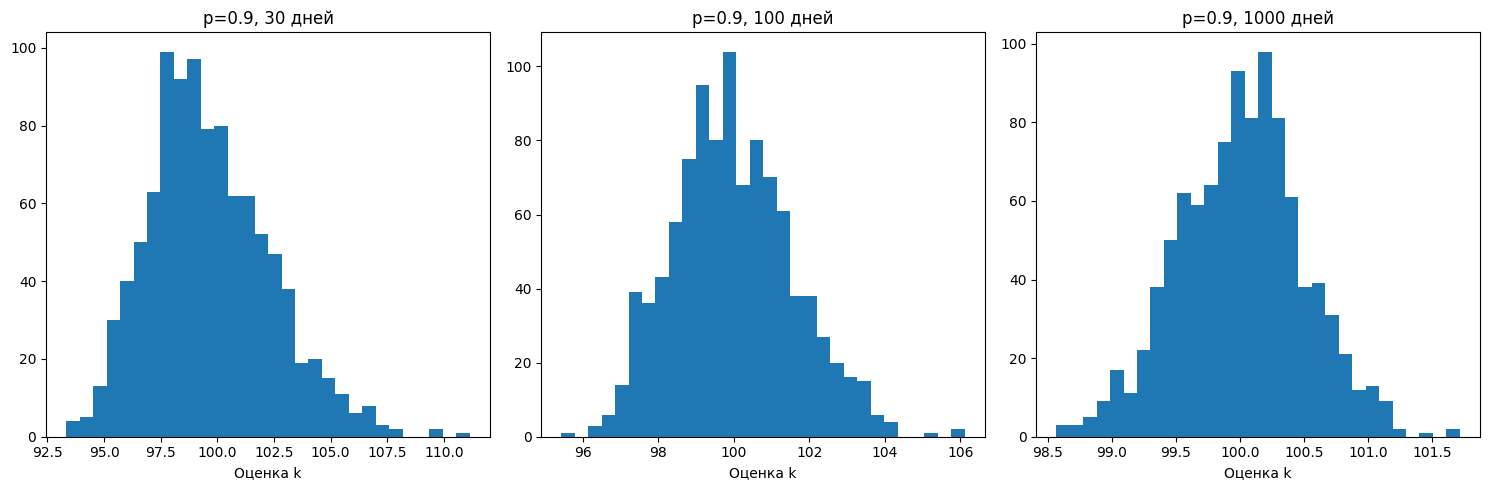

In [ ]:
k = 100
p = 0.9
N = 1000
days = [30, 100, 1000]

k_arr = []

for day in days:
    data = rnd.binomial(k, p, size=(N, day))
    E_x = np.mean(data, axis=1)
    E_x2 = np.mean(data**2, axis=1)
    p_est = 1 + E_x - E_x2 / E_x
    k_est = E_x / p_est
    k_arr.append(k_est)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i in range(3):
    axes[i].hist(k_arr[i], bins=30)
    axes[i].set_xlabel('Оценка k')
    axes[i].set_title(f'p=0.9, {days[i]} дней')
plt.tight_layout()
plt.show()

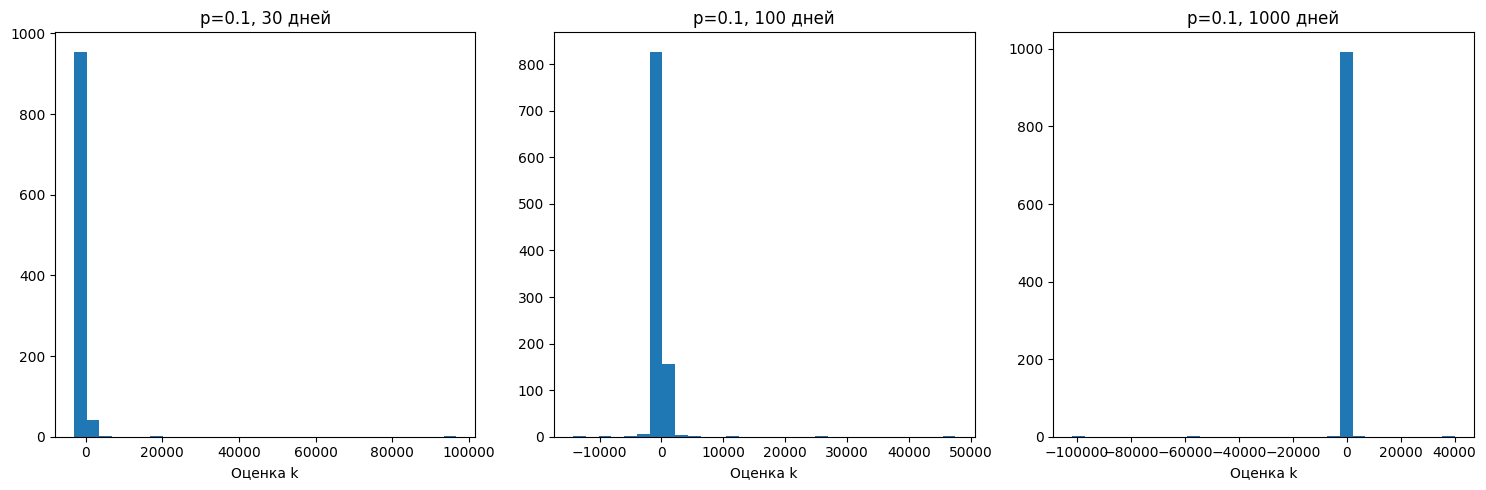

In [ ]:
p = 0.1
k_arr = []

for day in days:
    data = rnd.binomial(k, p, size=(N, day))
    E_x = np.mean(data, axis=1)
    E_x2 = np.mean(data**2, axis=1)
    p_est = 1 + E_x - E_x2 / E_x
    k_est = E_x / p_est
    k_arr.append(k_est)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i in range(3):
    axes[i].hist(k_arr[i], bins=30)
    axes[i].set_xlabel('Оценка k')
    axes[i].set_title(f'p=0.1, {days[i]} дней')

plt.tight_layout()
plt.show()

ВЫВОД:
При увеличении количества дней увеличивается и точность оценки, т.к. уменьшается среднеквадратичное отклонение. Однако для p = 0.1 оценка не точна, т.к. вероятность сообщения о преступлении низкая. Для 0.9 более точная оценка.

## Метод максимального правдоподобия

### Бракованные детали

Пусть на заводе производятся партии по `K=10000` деталей. Вероятность брака равна `p=0.002`. Каким распределением следует приблизить число бракованных деталей в партии?

Пусть на заводе есть идеальный механизм контроля качества деталей, то есть мы знаем число бракованных деталей в каждой партии. Дано `N=1, 2, 5, 10, 100` партий. Постройте график зависимости функции правдоподобия от оценки для `p`. Для каждого значения `N` численно найдите оценку максимального правдоподобия для `p`, повторите процедуру 100 раз. Найдите оценку максимального правдоподобия аналитически. Прокомментируйте результаты.

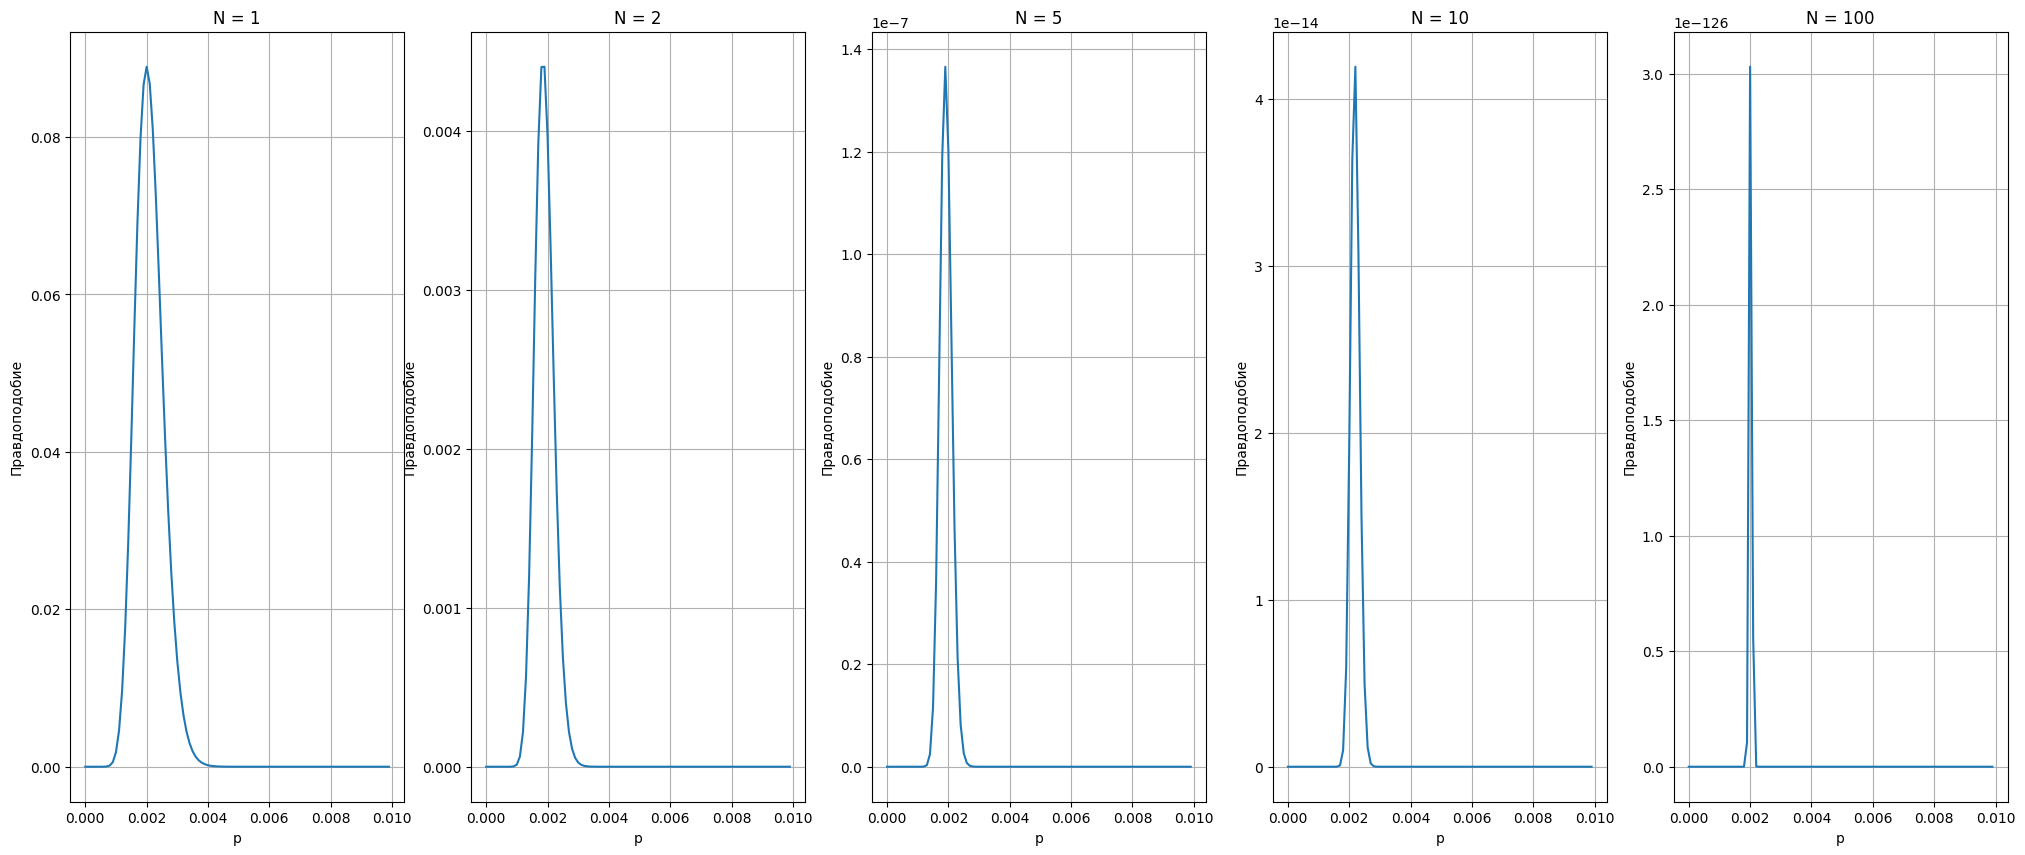

In [ ]:
from scipy.special import comb

K = 10000
p = 0.002
N = [1, 2, 5, 10, 100]
rep = 100

fig, ax = plt.subplots(1, 5, figsize=(25, 10))
P = np.arange(0, 0.01, 0.0001)

for i in range(5):
    n = N[i]
    k = rnd.binomial(K, p, n)
    l_func_arr = []
    for p_val in P:
        l_func = 1
        for j in range(n):
            l_func *= comb(K, k[j]) * (p_val**k[j]) * ((1 - p_val)**(K - k[j]))
        l_func_arr.append(l_func)
    ax[i].plot(P, l_func_arr)
    ax[i].set_title(f'N = {N[i]}')
    ax[i].set_xlabel('p')
    ax[i].set_ylabel('Правдоподобие')
    ax[i].grid(True)

plt.show()


ВЫВОД:
При увеличении N уменьшается разброс значений

аналитически вычисленные оценки:
N = 1 p = 0.0022
N = 2 p = 0.002
N = 5 p = 0.0021
N = 10 p = 0.002
N = 100 p = 0.0019


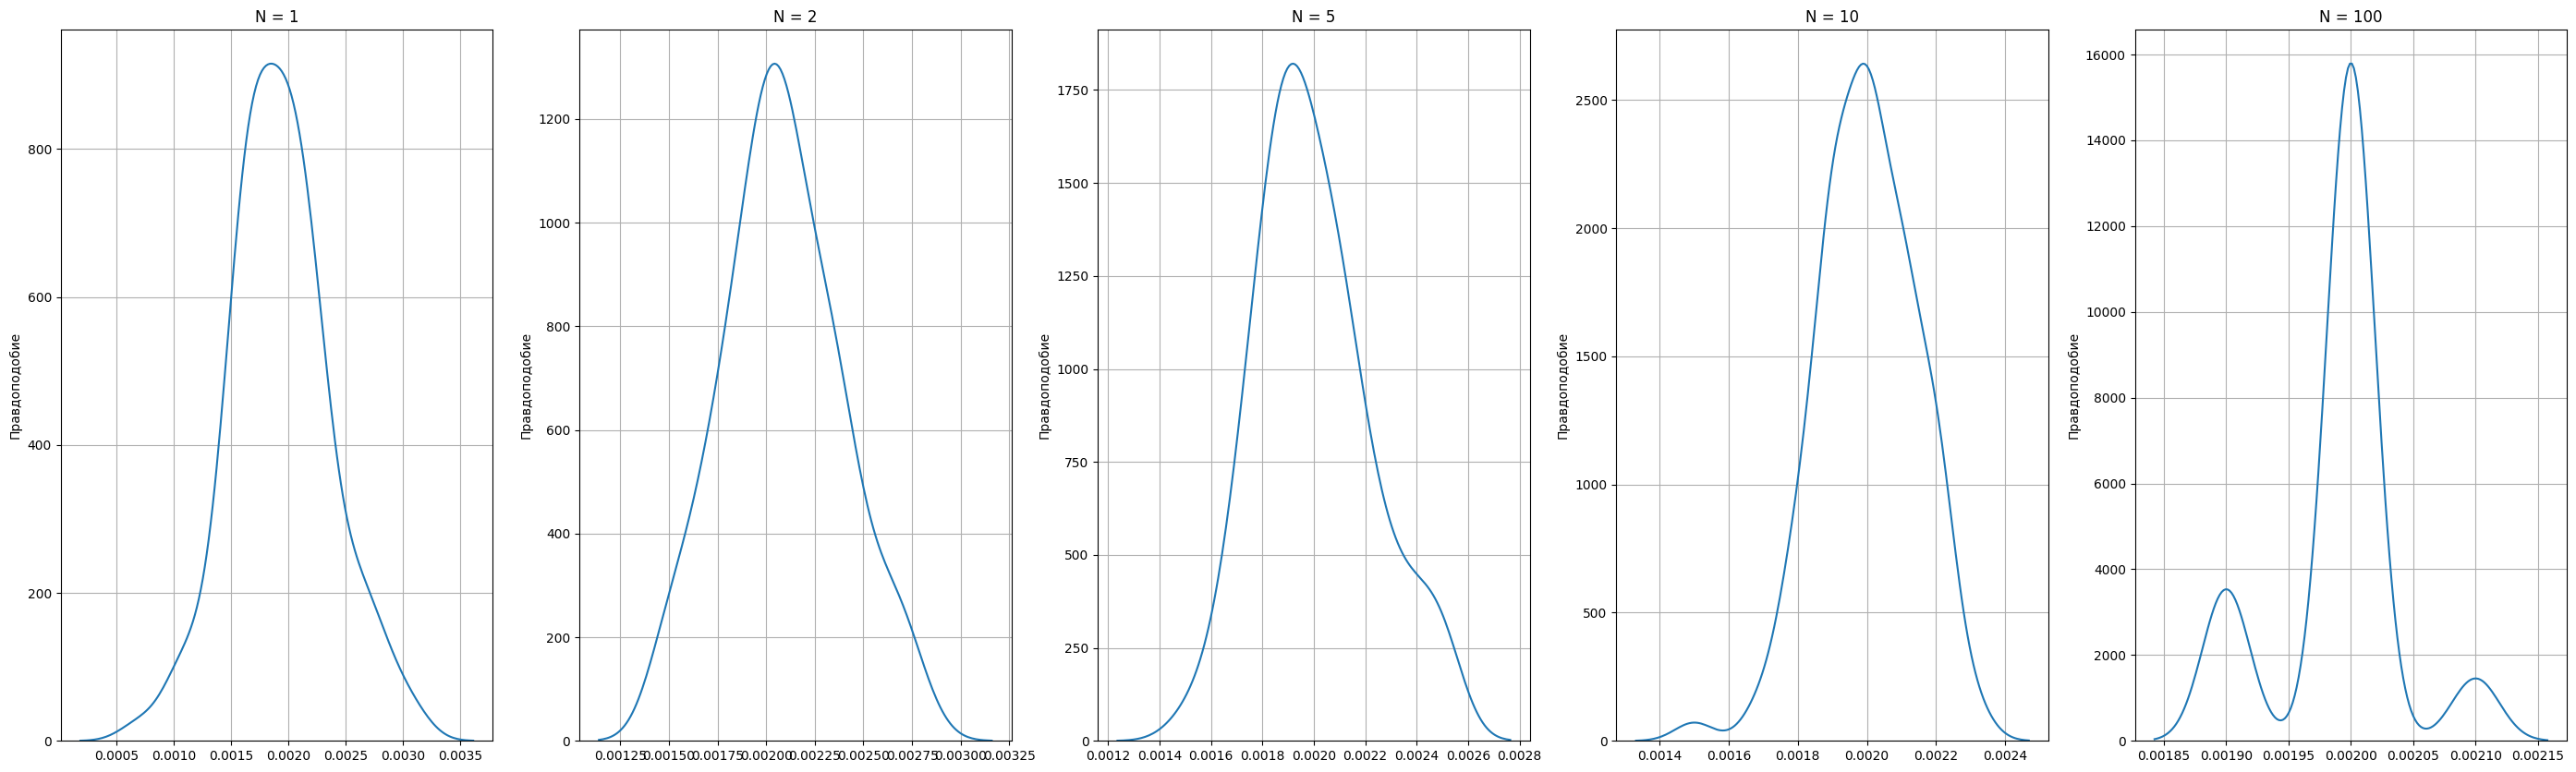

In [ ]:
#аналитически

P = np.arange(0, 0.01, 0.0001)
fig, ax = plt.subplots(1, 5, figsize=(35, 10))

print("аналитически вычисленные оценки:")
for i in range(5):
    n = N[i]
    k = rnd.binomial(K, p, n)
    p_sum = 0
    for k_i in k:
        p_sum += k_i / K
    exp = round(p_sum / n, 4)
    print("N =", n, "p =", exp)

    P_arr = []
    for j in range(rep):
        k = rnd.binomial(K, p, n)
        max_l = 0
        p_exp = 0
        for p_val in P:
            l = 1
            for k_j in k:
                l *= comb(K, k_j) * (p_val**k_j) * ((1 - p_val)**(K - k_j))
            if l > max_l:
                max_l = l
                p_exp = p_val
        P_arr.append(p_exp)
    sns.kdeplot(P_arr, ax=ax[i])
    ax[i].set_title(f'N = {n}')
    ax[i].set_ylabel('Правдоподобие')
    ax[i].grid(True)

plt.show()

ВЫВОД:
При увеличении N аналитическая оценка стремится к численной

### Назад к криминалу

В задаче о числе преступлений получены наблюдения за 5 дней. В первом городе: 16, 18, 22, 25, 27. Во втором городе: 16, 18, 22, 25, 28. Найти оценку максимального правдоподобия для `k` в каждом из городов. Постарайтесь объяснить результат, численно исследовав поведение функции максимального правдоподобия.

Оценка для города 1: 99
Оценка для города 2: 191


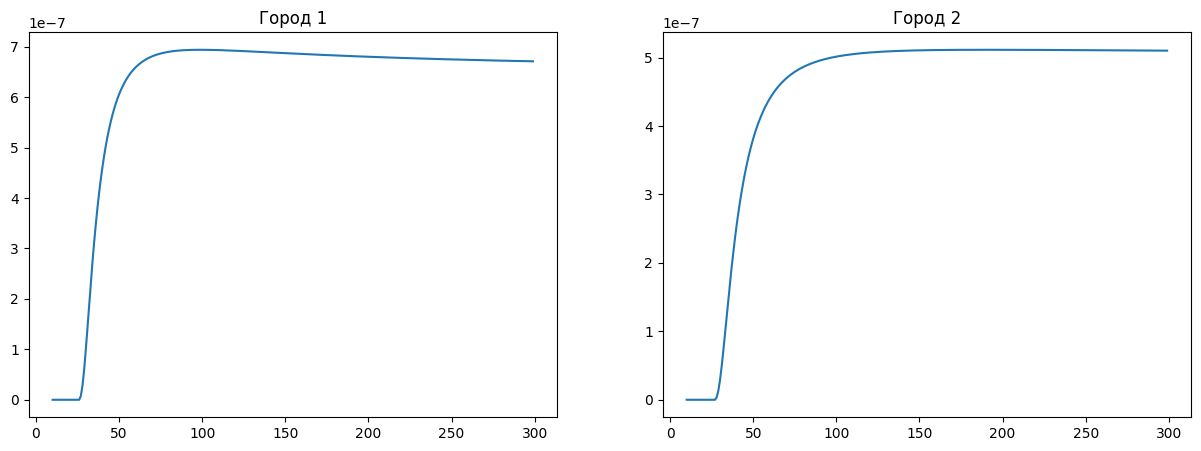

In [ ]:
city1 = np.array([16, 18, 22, 25, 27])
city2 = np.array([16, 18, 22, 25, 28])

def l_func(K, p, n, city):
    l = 1
    for k in city:
        l *= comb(K, k) * (p**k) * ((1 - p)**(K - k))
    return l

def mle(city):
    max_l, K_res = -1, -1
    for K in range(10, 300):
        p = city.sum() / (5 * K)
        l_0 = l_func(K, p, 5, city)
        if l_0 > max_l:
            max_l = l_0
            K_res = K
    return K_res

print("Оценка для города 1:", mle(city1))
print("Оценка для города 2:", mle(city2))

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

k_arr = np.arange(10, 300)
y1 = [l_func(K, city1.sum() / (5 * K), 5, city1) for K in k_arr]
y2 = [l_func(K, city2.sum() / (5 * K), 5, city2) for K in k_arr]

ax[0].plot(k_arr, y1)
ax[1].plot(k_arr, y2)

ax[0].set_title('Город 1')
ax[1].set_title('Город 2')

plt.show()

### Скучная дополнительная задача
Численно проверить возможность приближения биномиального распределения пуассоновским и нормальным распределениями в зависимости от различных значений параметров.

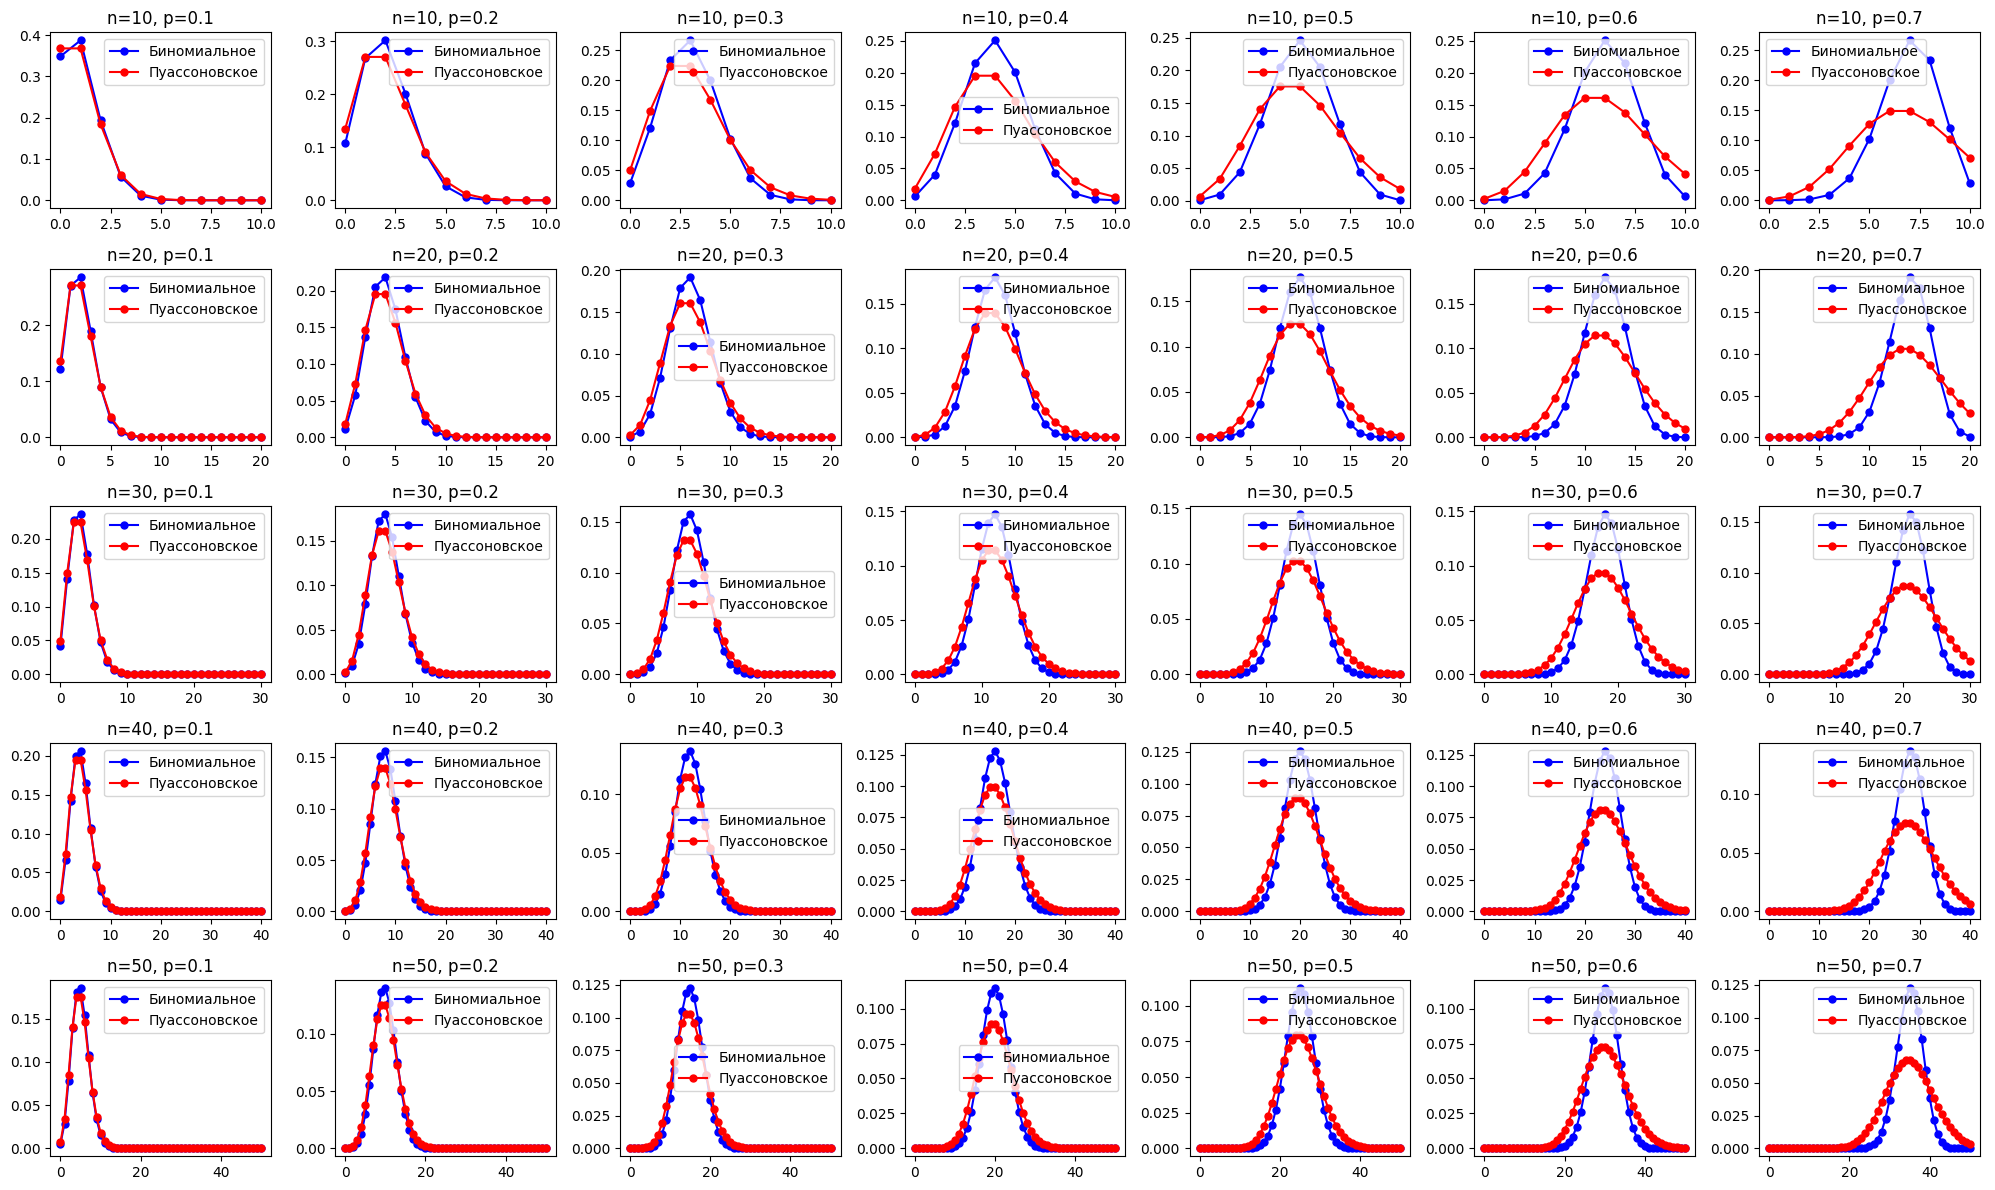

In [ ]:
from scipy.stats import binom, poisson

n_arr = [10, 20, 30, 40, 50]
p_arr = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]

fig, axes = plt.subplots(len(n_arr), len(p_arr), figsize=(20, 12))

for i, n in enumerate(n_arr):
    for j, p in enumerate(p_arr):
        x = np.arange(0, n+1)
        bin = binom.pmf(x, n, p)

        lambda_ = n * p
        pois = poisson.pmf(x, lambda_)

        ax = axes[i, j]
        ax.plot(x, bin, 'bo-', ms=5, label='Биномиальное')
        ax.plot(x, pois, 'ro-', ms=5, label='Пуассоновское')
        ax.set_title(f'n={n}, p={p}')
        ax.legend()

plt.tight_layout()
plt.show()

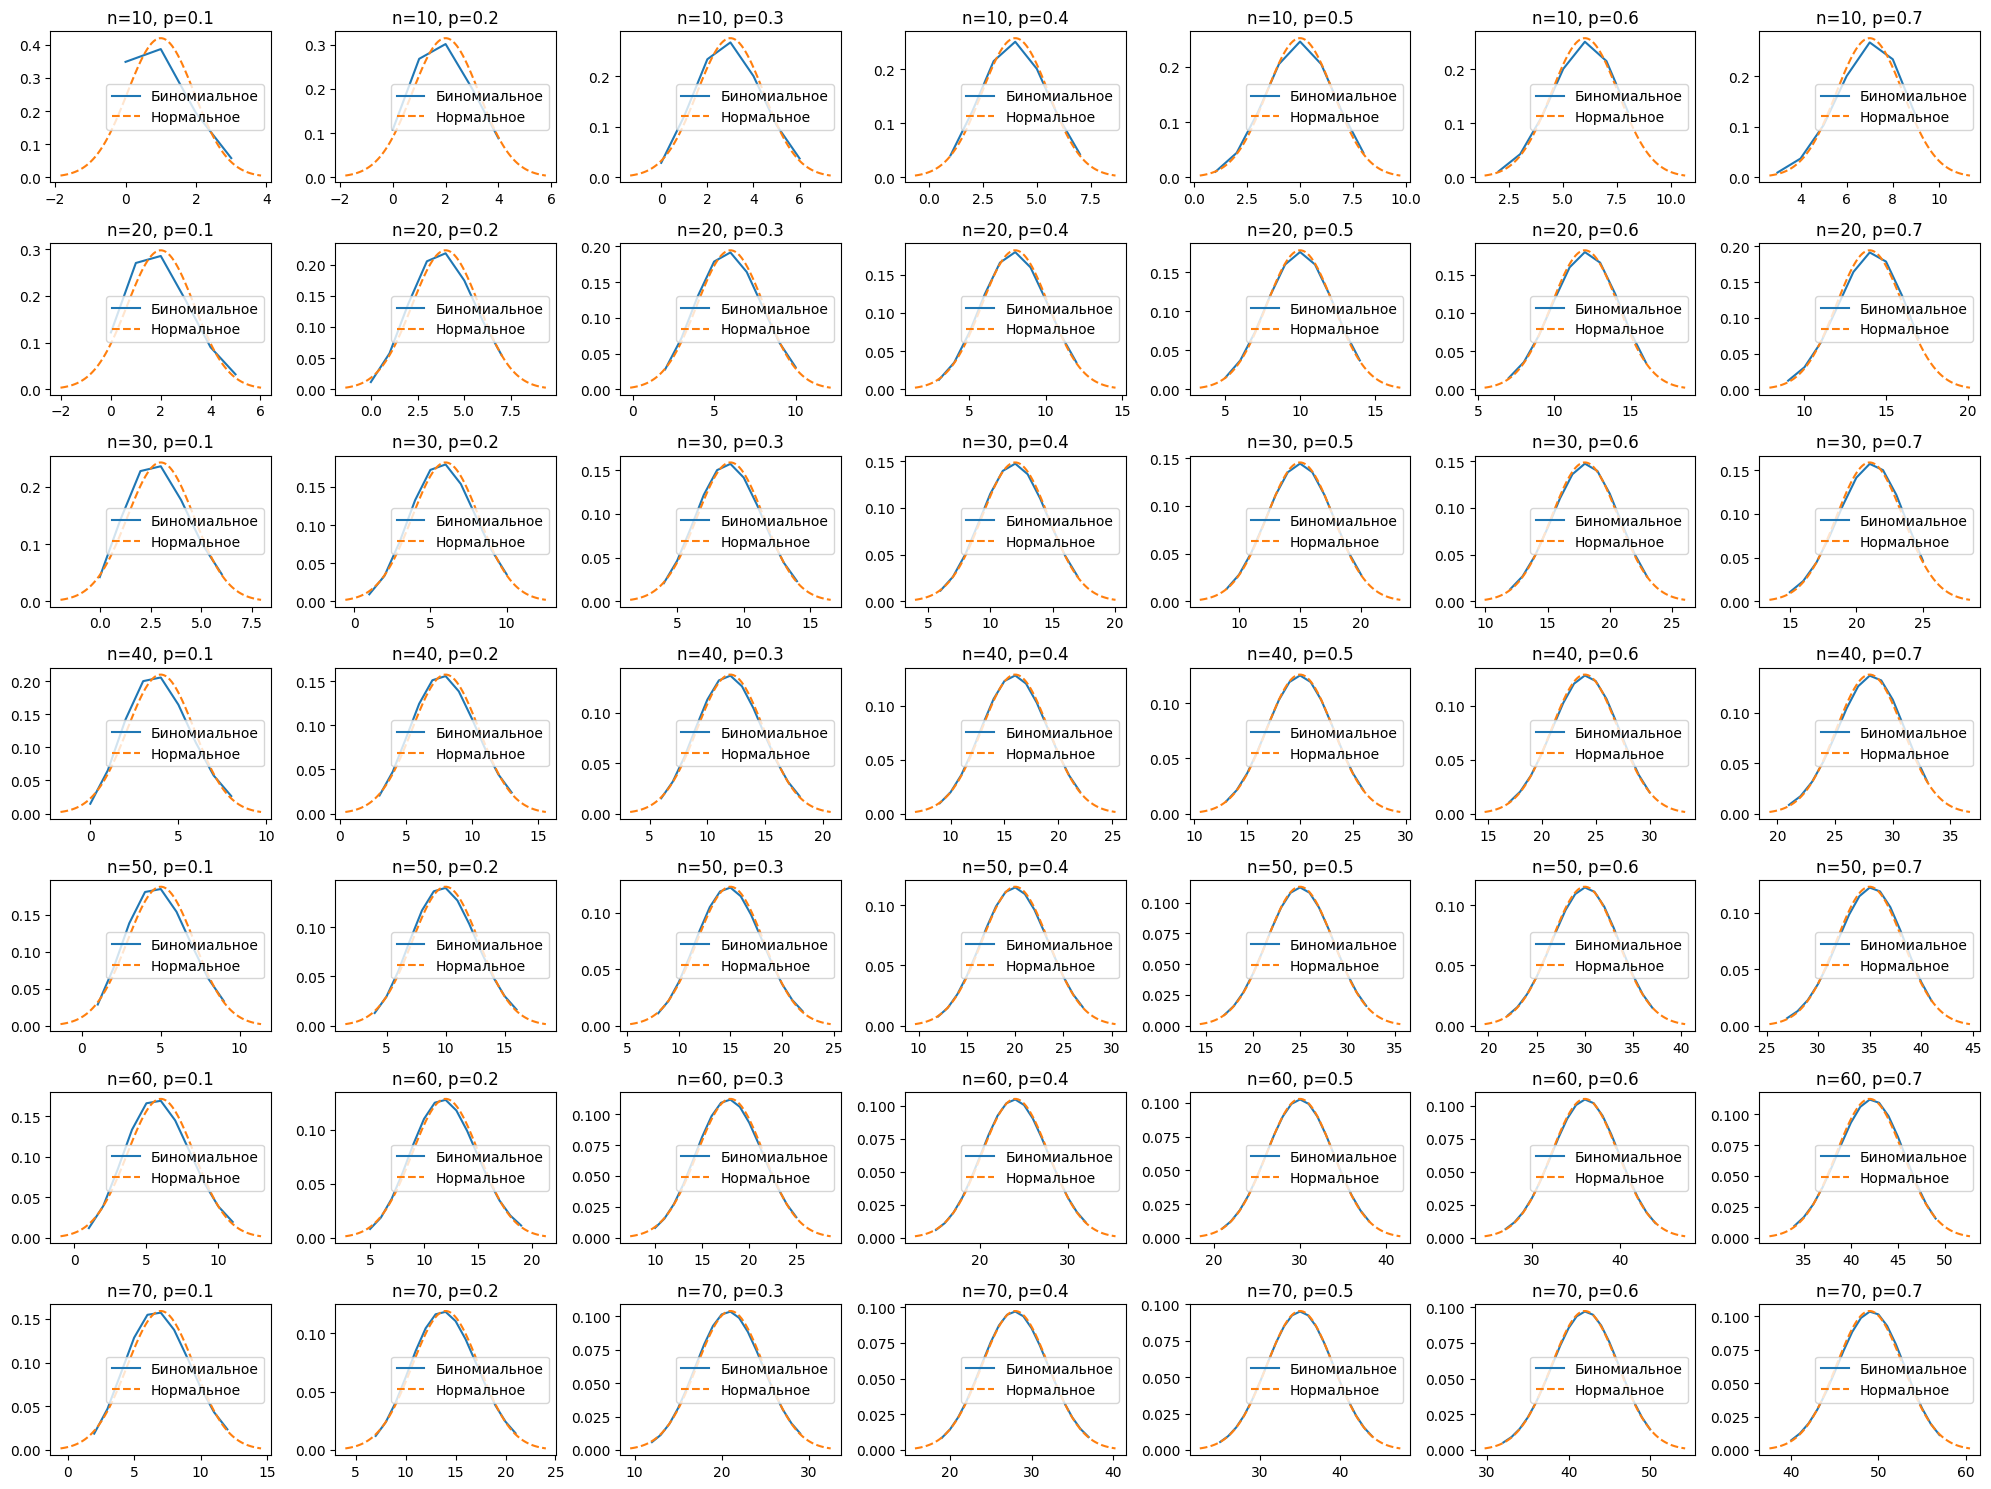

In [ ]:
from scipy.stats import norm

n_arr = [10, 20, 30, 40, 50, 60, 70]
p_arr = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]

fig, axs = plt.subplots(len(n_arr), len(p_arr), figsize=(20, 15))

for i, n in enumerate(n_arr):
    for j, p in enumerate(p_arr):
        mu = n * p
        sigma = np.sqrt(n * p * (1 - p))
        x_bin = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.99, n, p))
        y_bin = binom.pmf(x_bin, n, p)
        x_norm = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
        y_norm = norm.pdf(x_norm, mu, sigma)

        axs[i, j].plot(x_bin, y_bin, label='Биномиальное')
        axs[i, j].plot(x_norm, y_norm, label='Нормальное', linestyle='--')
        axs[i, j].legend()
        axs[i, j].set_title(f'n={n}, p={p}')

plt.tight_layout()
plt.show()
